# The `sifter`

This tutorial shows how to use the `sifter()` function to apply `SiFT` with a single function call.

We use the Drosophila wing disc development single cell data [[1]](https://doi.org/10.7554/eLife.61276) for the demonstration.

[[1] Everetts, N. J., Worley, M. I., Yasutomi, R., Yosef, N., & Hariharan, I. K. (2021). Single-cell transcriptomics of the Drosophila wing disc reveals instructive epithelium-to-myoblast interactions. Elife, 10, e61276.](https://doi.org/10.7554/eLife.61276)


In [1]:
import scanpy as sc

import sift

## Import data

download pre-processed data [drosopila.annotated.h5ad](https://drive.google.com/file/d/1onaka32WOxtUzk9fuRGO0E-Fb60KEoU5/view?usp=sharing)

In [2]:
DATA_DIR = ".../drosophila.annotated.h5ad"  # set path to anndata

In [3]:
adata = sc.read(DATA_DIR)

## Run `sifter`

We apply filtering using a _mapping kernel_ (`metric="mapping"`) defined with respect to
cell cycle and sex labels (`kernel_key="phase_sex"`)
and filtering the gene expression (`embedding_key="X"`).

Additional parameters we can specify are:

* `copy`: bool stating whether the `adata` is modified in place or copied.
* `pseudocount`: add a `pseudocount` to the filtered object to ensure non-negativity of `X`.



In [4]:
metric_ = "mapping"
kernel_key_ = "phase_sex"
embedding_key_ = "X"

In [5]:
sift.sifter(
    adata=adata,
    kernel_key=kernel_key_,
    metric=metric_,
    embedding_key=embedding_key_,
    copy=False,
    pseudocount=False,
)

INFO     sift: initialized a SiFTer with mapping kernel.                                                           
INFO     sift: Filtering cell-cell similarity kernel using projection on `X`.                                      
INFO     sift: The data is `SiFTed`!                                                                               
         The filtered embedding is stored in `adata.X`                                                             
             Finish                                                                                                


## Visualize results

We observe the removal of the  nuisance effect with respect to the `cell cycle`, `sex`,  `cc \& sex` labels along-with the marker genes `PCNA` (cell cycle marker), and `lncRNA:roX1` (sex marker).

Further, for a biological marker gene, `Nrt`, we see a pattern is preserved.

In [ ]:
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

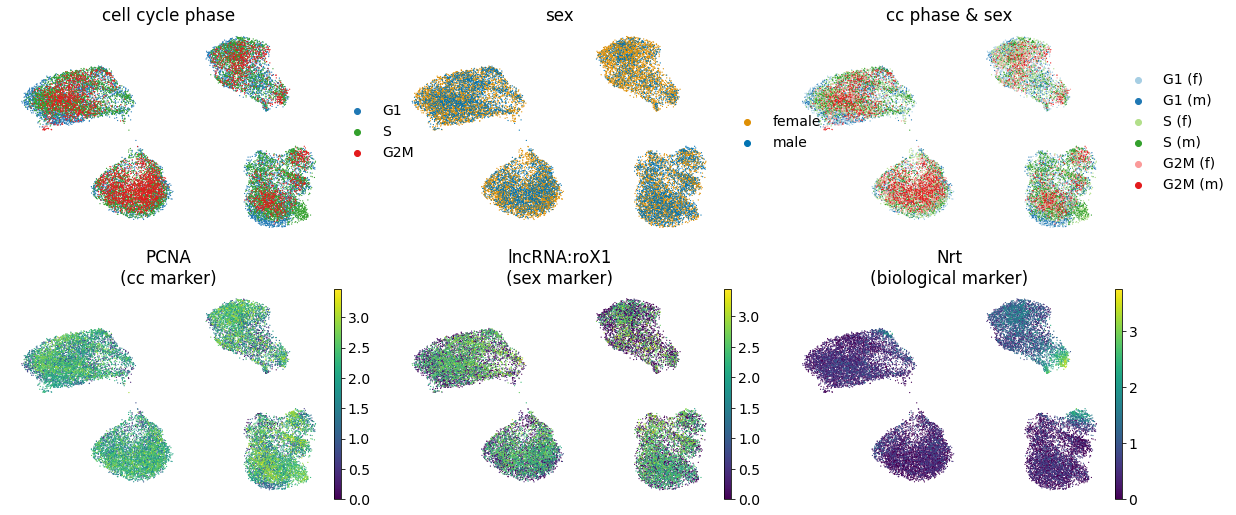

In [7]:
sc.pl.umap(
    adata,
    color=["phase", "sex", "phase_sex", "PCNA", "lncRNA:roX1", "Nrt"],
    title=[
        "cell cycle phase",
        "sex",
        "cc phase & sex",
        "PCNA\n(cc marker)",
        "lncRNA:roX1\n(sex marker)",
        "Nrt\n(biological marker)",
    ],
    frameon=False,
    wspace=0.1,
    ncols=3,
)